In [191]:
import os
import sys
import pickle
import pandas as pd

from config import *
import numpy as np



from projects.Plotting.python.plotting_layout import *



import matplotlib.pyplot as plt
import matplotlib
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
matplotlib.style.use('ggplot')
%matplotlib inline

In [192]:
_RESULTS_DIR = os.path.join(PARENT_DIR_PATH,'results')

In [193]:
_TID_DATA_DIR = os.path.join(_RESULTS_DIR,'result_LHC_blm_dose_calculations')

In [194]:
for p,d,f in os.walk(_TID_DATA_DIR):
    files = f
    break

In [197]:
len(files)

25

In [10]:
ip7_data_files = list(i for i in files if '_19590_20400' in i)

['n_int_TID2016-04-03_2016-10-30_dcum_19590_20400.txt',
 'n_int_TID2017-05-01_2017-10-15_dcum_19590_20400.txt']

In [237]:
def year_compare(year_info_1,year_info_2,normalizer):
    file_1 = year_info_1['file']
    info_1 = year_info_1['info']
    file_2 = year_info_2['file']
    info_2 = year_info_2['info']
    

    with open(os.path.join(_TID_DATA_DIR,file_1),'r') as f:
        data_1 = pd.read_table(f, sep='\t',header = 0,names = ['dcum','1'],index_col = 0)

    with open(os.path.join(_TID_DATA_DIR,file_2),'r') as f:
        data_2 = pd.read_table(f, sep='\t',header = 0,names = ['dcum','2'],index_col = 0)
    
    print('ok')
    print(data_1.head())
    print(data_2.head())
    print(data_1.shape)
    print(data_2.shape)
    
#     return(data_1,data_2)

#     _data = pd.concat([data_1,data_2],axis = 1).dropna(axis=0, how='any')

    _data = data_1.merge(data_2)
    _data = _data.sort_values(by=['dcum'])
    _data['1/2'] = _data['1']/_data['2']
    
#     return _data
    print(np.mean(_data['1/2']))
    print(np.std(_data['1/2']))

    pl = plotter_layout()
    pl.start = _data['dcum'].iloc[0]
    pl.end = _data['dcum'].iloc[-1]
    fig = plt.figure(figsize=(16, 8))
    fig.subplots_adjust(hspace=.001)
    
   
    ax1 = plt.subplot2grid((3,2), (0, 0), colspan=3,rowspan = 2)
    ax1.set_title('Ratio of the {} and {} data \n data normalized with {}'.format(info_1,info_2,normalizer),fontsize = 16)
    ax1.set_xlim(pl.start,pl.end)
    ax1.set_ylim(0,3)
    ax1.set_ylabel('Ratio')
    ax1.text(pl.start+0.05*(pl.end-pl.start), 2.5, r'$\mu$ : {:.2f}'.format(np.mean(_data['1/2'])), fontsize=15)
    ax1.text(pl.start+0.05*(pl.end-pl.start), 2.25, r'$\sigma$ :{:.2f}'.format(np.std(_data['1/2'])), fontsize=15)
#     ax1.set_yaxis(fontsize = 14)
    ax1.text(pl.start+0.5*(pl.end-pl.start), 1.5, 'Preliminary',va = 'center',ha = 'center',alpha = .2,fontsize=46,rotation=45)
    ax1.tick_params(axis='y', labelsize = 12)
    ax1.plot((pl.start,pl.end),(1,1),'k')
    ax1.plot(_data['dcum'],_data['1/2'],label = info_1+'/'+info_2)
    ax1.legend(loc = 1, fontsize = 14)
    ax2 = plt.subplot2grid((3, 2), (2, 0), colspan=3)
    pl.x_off = 0
    pl.plotter_layout(ax2,0,1)
    ax2.text(pl.start+0.95*(pl.end-pl.start), -7.5, 'courtesy MCWG',va = 'center',ha = 'right',alpha = .2,fontsize=14)

1.7737496583802401
3.857397843107325
dir ok
file ok
file ok


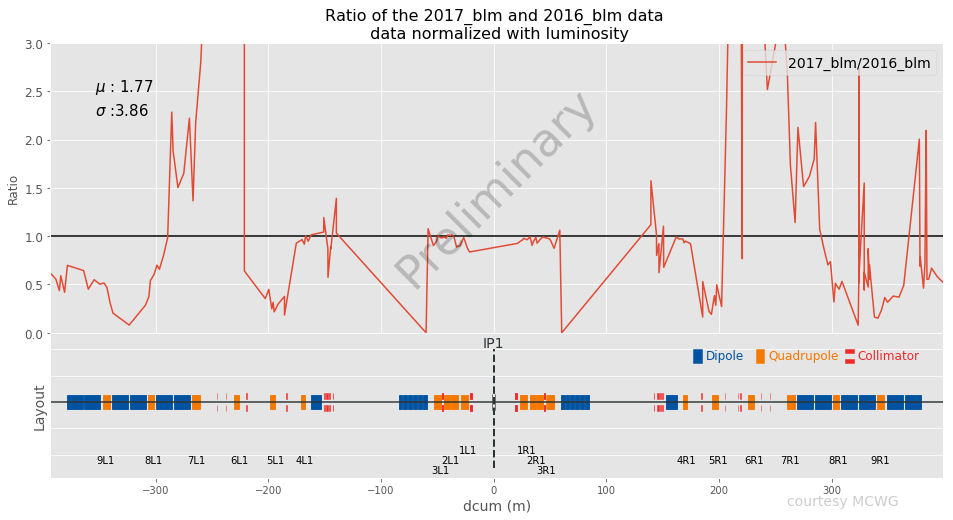

In [188]:
# _1_data_file = 'n_lum_TID2017-05-01_2017-10-15_dcum_-406_406.txt'
# _2_data_file = 'n_lum_TID2016-04-03_2016-10-30_dcum_-406_406.txt'

# normalizer = 'luminosity'
# info_2017 = {'file':_1_data_file,'info':'2017_blm'}
# info_2016 = {'file':_2_data_file,'info':'2016_blm'}

# year_compare(info_2017,info_2016,normalizer)
   

ok
                     dcum             1
BLMBI.11R2.B0T10  3736.03  2.157437e-23
BLMAI.11R2.B1I21  3742.28  1.690195e-23
BLMAI.11R2.B1I22  3747.48  1.226016e-23
BLMAI.11R2.B1I23  3750.24  2.955790e-23
BLMBI.11R2.B0T20  3751.69  3.466344e-23
                     dcum             2
BLMBI.11R2.B0T10  3736.03  5.090236e-23
BLMAL.11R2.B1I30  3736.93  5.312403e-21
BLMAI.11R2.B1I30  3737.28  3.712600e-23
BLMAL.11R2.B1I21  3741.93  1.879171e-20
BLMAI.11R2.B1I21  3742.28  2.911933e-23
(301, 2)
(308, 2)
0.699453769746181
2.2747596196792625
dir ok
file ok
file ok


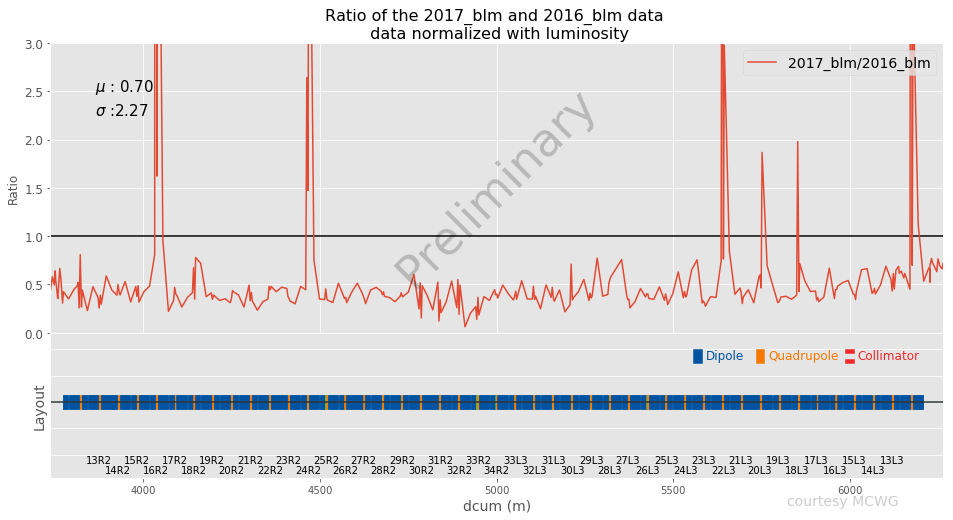

In [238]:
_1_data_file = 'n_int_TID2017-05-01_2017-10-15_dcum_3710_6288.txt'
_2_data_file = 'n_int_TID2016-04-03_2016-10-30_dcum_3710_6288.txt'

normalizer = 'luminosity'
info_2017 = {'file':_1_data_file,'info':'2017_blm'}
info_2016 = {'file':_2_data_file,'info':'2016_blm'}

t= year_compare(info_2017,info_2016,normalizer)
   

In [221]:
tt = t[0].merge(t[1])

In [222]:
tt.isnull().sum()

dcum    0
1       0
2       0
dtype: int64

0.9139602256398927
0.41601353487645276
dir ok
file ok
file ok


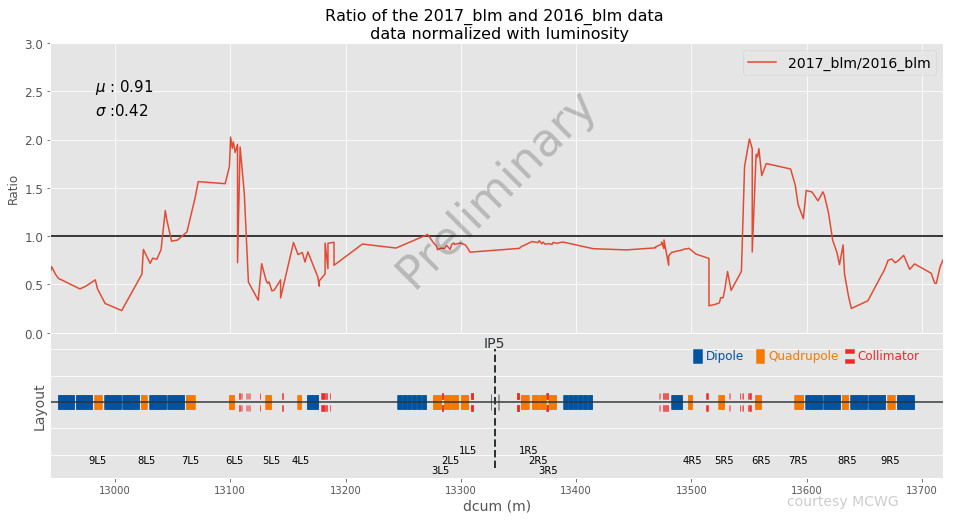

In [189]:
_1_data_file = 'n_lum_TID2017-05-01_2017-10-15_dcum_12932_13726.txt' 
_2_data_file = 'n_lum_TID2016-04-03_2016-10-30_dcum_12932_13726.txt'

normalizer = 'luminosity'
info_2017 = {'file':_1_data_file,'info':'2017_blm'}
info_2016 = {'file':_2_data_file,'info':'2016_blm'}

year_compare(info_2017,info_2016,normalizer)
   

1.2162658744145034
0.44912953560898716
dir ok
file ok
file ok


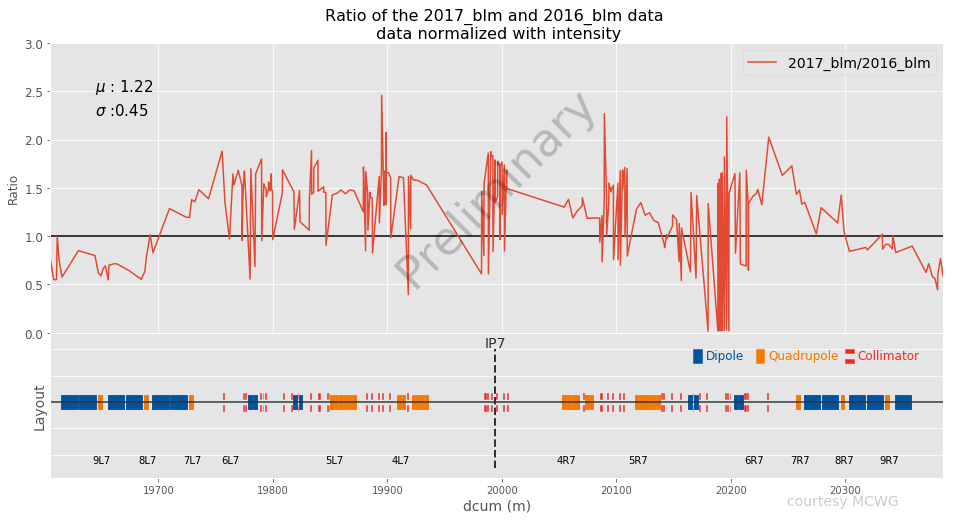

In [190]:
_1_data_file = 'n_int_TID2017-05-01_2017-10-15_dcum_19590_20400.txt'
_2_data_file = 'n_int_TID2016-04-03_2016-10-30_dcum_19590_20400.txt'

normalizer = 'intensity'
info_2017 = {'file':_1_data_file,'info':'2017_blm'}
info_2016 = {'file':_2_data_file,'info':'2016_blm'}

year_compare(info_2017,info_2016,normalizer)
   